In [4]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from matplotlib.pyplot import figure
from tabulate import tabulate 

ModuleNotFoundError: No module named 'tabulate'

In [5]:
import codecs 
f = codecs.open('data-5283-2020-03-05.json', encoding='cp1251')

In [6]:
data = pd.read_json(f)

In [7]:
#Количество пожаров в каждом году
c = Counter([])
for i, item in enumerate(data['Year']):
    c[item] += data['Calls'][i] 

years = list(c.keys())
calls = list(c.values())

NameError: name 'tabulate' is not defined

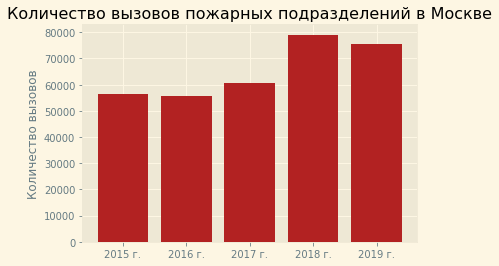

In [8]:
plt.style.use('Solarize_Light2')
fmt_y = []
for y in years[:-1]:
    fmt_y.append(str(y) + ' г.')

plt.bar(fmt_y, calls[:-1], color = 'firebrick')
plt.title('Количество вызовов пожарных подразделений в Москве')
plt.ylabel('Количество вызовов')

print(tabulate([calls[:-1]], headers = fmt_y, tablefmt="fancy_grid"))
plt.show()

In [ ]:
#Количество пожаров по месяцам
c_m = Counter([])
for i, item in enumerate(data['Month']):
    if data['Year'][i] < 2020:
        temp = item[0].upper() + item[1:]
        if (temp == 'Сентября'):
            temp = 'Сентябрь'
        c_m[temp] += data['Calls'][i]
        

months = list(c_m.keys())
calls_m = list(c_m.values())
calls_l = list(map(str, c_m.values()))

print(tabulate([c_m.values()], headers = months))


plt.style.use('Solarize_Light2')
fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(months, calls_m, color = 'firebrick')

plt.title('Количество вызовов пожарных подразделений в Москве')
plt.xticks(ticks = x_indexes, labels = m_in_y[2015].keys())
plt.ylabel('Количество вызовов')
#plt.xlabel('Месяца')`
#plt.legend()    


#print(plt.style.available)
plt.tight_layout()
plt.show()


In [9]:
#Количество пожаров по месяцам
c_m = Counter([])
for i, item in enumerate(data['Month']):
    if data['Year'][i] == 2018:
        temp = item[0].upper() + item[1:]
        if (temp == 'Сентября'):
            temp = 'Сентябрь'
        c_m[temp] += data['Calls'][i]
        

months = list(c_m.keys())
calls_m = list(c_m.values())
calls_l = list(map(str, c_m.values()))

print(tabulate([c_m.values()], headers = months))


plt.style.use('Solarize_Light2')
fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(months, calls_m, color = 'firebrick')

plt.title('Количество вызовов пожарных подразделений в Москве в 2018 году')
plt.xticks(ticks = x_indexes, labels = m_in_y[2015].keys())
plt.ylabel('Количество вызовов')
#plt.xlabel('Месяца')`
#plt.legend()    


#print(plt.style.available)
plt.tight_layout()
plt.show()



NameError: name 'tabulate' is not defined

In [10]:
#Количество пожаров по месяцам каждомЪ году
temp_l = []
for i in range(2015, 2020):
    temp_l.append((i, dict()))
                   
m_in_y = dict(temp_l)
for i, item in enumerate(data['Month']):
    if data['Year'][i] < 2020:
        temp = item[0].upper() + item[1:]
        if (temp == 'Сентября'):
            temp = 'Сентябрь'
        if temp not in  m_in_y[data['Year'][i]]:
            m_in_y[data['Year'][i]][temp] = 0
        m_in_y[data['Year'][i]][temp] += data['Calls'][i]


2015
dict_values([4689, 2535, 6092, 7671, 3568, 4351, 4403, 4569, 4674, 4972, 4536, 4313])
2016
dict_values([5043, 4218, 4708, 5884, 5478, 4630, 4601, 4527, 3832, 4254, 4080, 4565])
2017
dict_values([5081, 4825, 4543, 5365, 5277, 4560, 4479, 4824, 5175, 5037, 5067, 6283])
2018
dict_values([5534, 5870, 6279, 8287, 7361, 6888, 5853, 6448, 6745, 6908, 6404, 6500])
2019
dict_values([4713, 6307, 6126, 7947, 6645, 7008, 5668, 6075, 6953, 5719, 5853, 6622])


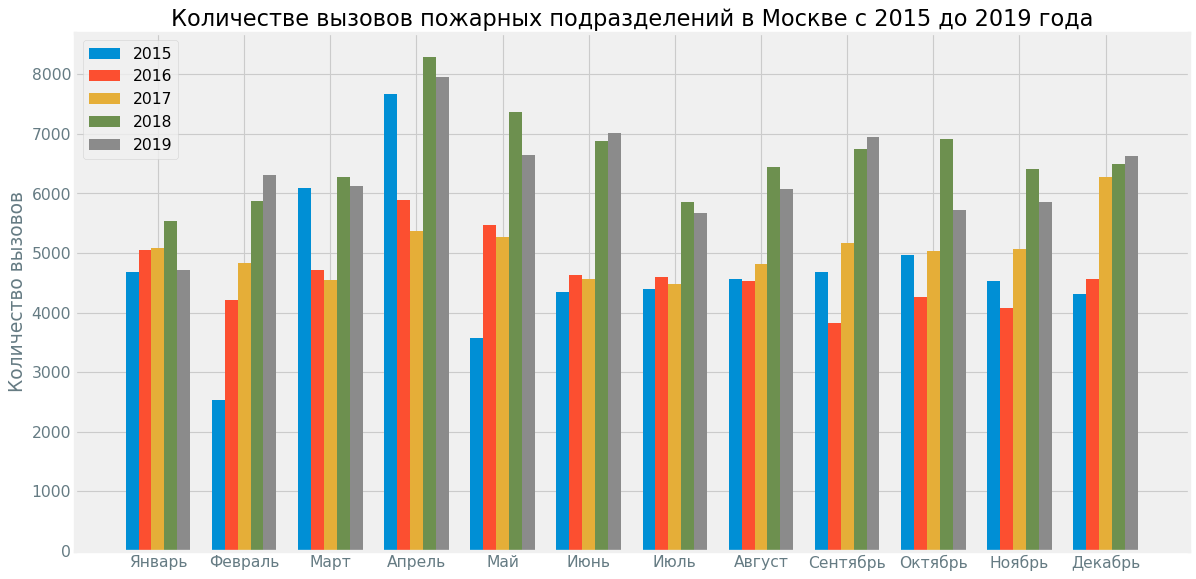

In [16]:
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
x_indexes = np.arange(12)
w = 0.15
p = -w*2
fig = figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
for k in m_in_y:
    print(k)
    print(m_in_y[k].values())
    
for k in m_in_y:
    plt.bar(x_indexes + p, list(m_in_y[k].values()), width = w, label = k )
    p += w 
    
plt.title('Количестве вызовов пожарных подразделений в Москве с 2015 до 2019 года')
plt.xticks(ticks = x_indexes, labels = m_in_y[2015].keys())
plt.ylabel('Количество вызовов')

plt.legend()
plt.show()

In [17]:
#Количество пожаров по ADMs
data15to19 = data[:-22]
temp_adms = []
for i, item in enumerate(data15to19['AdmArea']):
    temp_adms.append((item, 0))
    if i == 10:
        break

adm = dict(temp_adms)

for i, item in enumerate(data15to19['AdmArea']):
    if (item == 'Троицкий и Новомосковский административные округ а' 
        or item == 'Троицкий и Новомосковский административные  округа' or 
        item == 'Троицкий и Новомосковский  административные округа'
       or item == 'Троицкий и новомосковский административные округа' or
       item == 'Троицкий и Новомосковский административный округа'):
        item = 'Троицкий и Новомосковский административные округа'
        
    if item == 'ЮгоЗападный административный округ' or item == 'Юго-западный административный округ':
        item = 'Юго-Западный административный округ'
    if item ==  'Северно-Западный административный округ':
        item =  'Северо-Западный административный округ'
    if (item == 'Юго=Восточный административный округ' or item == 'Юго-Востосный административный округ' or
        item == 'Юго-Восточнный административный округ'):
        item = 'Юго-Восточный административный округ'
    if item == 'Северо-Востосный административный округ':
        item = 'Северо-Восточный административный округ'
    if item == 'Запдный административный округ':
        item = 'Западный административный округ'
    if item == 'Северо-Закпадный административный округ' or item == 'Северо-Заподный административный округ':
        item = 'Северо-Западный административный округ'
    if item[-1] == ' ':
        item = item[:-1]
    adm[item] += data15to19['Calls'][i]



['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


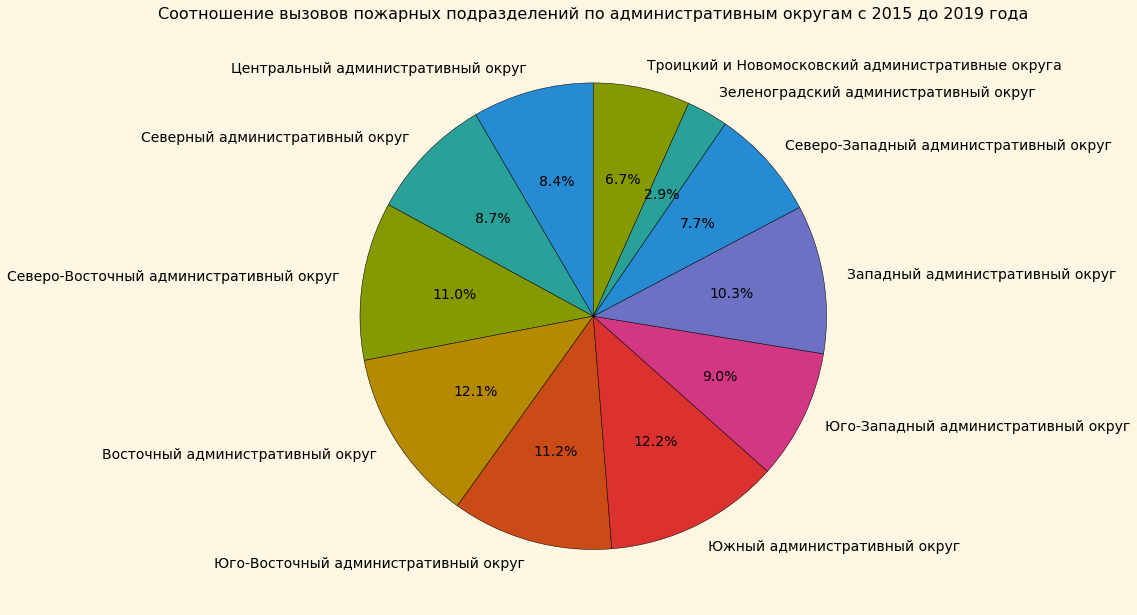

In [13]:
slices = list(adm.values())
labels = list(adm.keys())
plt.style.use('Solarize_Light2')
fig = figure(num=None, figsize=(20, 10))
plt.pie(slices, labels=labels, #shadow=True, 
        startangle
        =90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
print(plt.style.available)
plt.title('Cоотношение вызовов пожарных подразделений по административным округам с 2015 до 2019 года')
plt.show()

In [14]:
#Количество пожаров по ADMs

temp_adms = []
for i, item in enumerate(data15to19['AdmArea']):
    temp_adms.append((item, []))
    if i == 10:
        break

x_arg = []
for j in range(15, 20):
    for i in range(1, 13):
        temp = str(i) + '.' + str(j)
        if i < 10:
            temp = '0' + temp
        x_arg.append(temp)
        if (temp == '02.20'):
            break

        
adm_l = dict(temp_adms)

for i, item in enumerate(data15to19['AdmArea']):
    if (item == 'Троицкий и Новомосковский административные округ а' 
        or item == 'Троицкий и Новомосковский административные  округа' or 
        item == 'Троицкий и Новомосковский  административные округа'
       or item == 'Троицкий и новомосковский административные округа' or
       item == 'Троицкий и Новомосковский административный округа'):
        item = 'Троицкий и Новомосковский административные округа'
        
    if item == 'ЮгоЗападный административный округ' or item == 'Юго-западный административный округ':
        item = 'Юго-Западный административный округ'
    if item ==  'Северно-Западный административный округ':
        item =  'Северо-Западный административный округ'
    if (item == 'Юго=Восточный административный округ' or item == 'Юго-Востосный административный округ' or
        item == 'Юго-Восточнный административный округ'):
        item = 'Юго-Восточный административный округ'
    if item == 'Северо-Востосный административный округ':
        item = 'Северо-Восточный административный округ'
    if item == 'Запдный административный округ':
        item = 'Западный административный округ'
    if item == 'Северо-Закпадный административный округ' or item == 'Северо-Заподный административный округ':
        item = 'Северо-Западный административный округ'
    if item[-1] == ' ':
        item = item[:-1]
    adm_l[item].append(data15to19['Calls'][i])


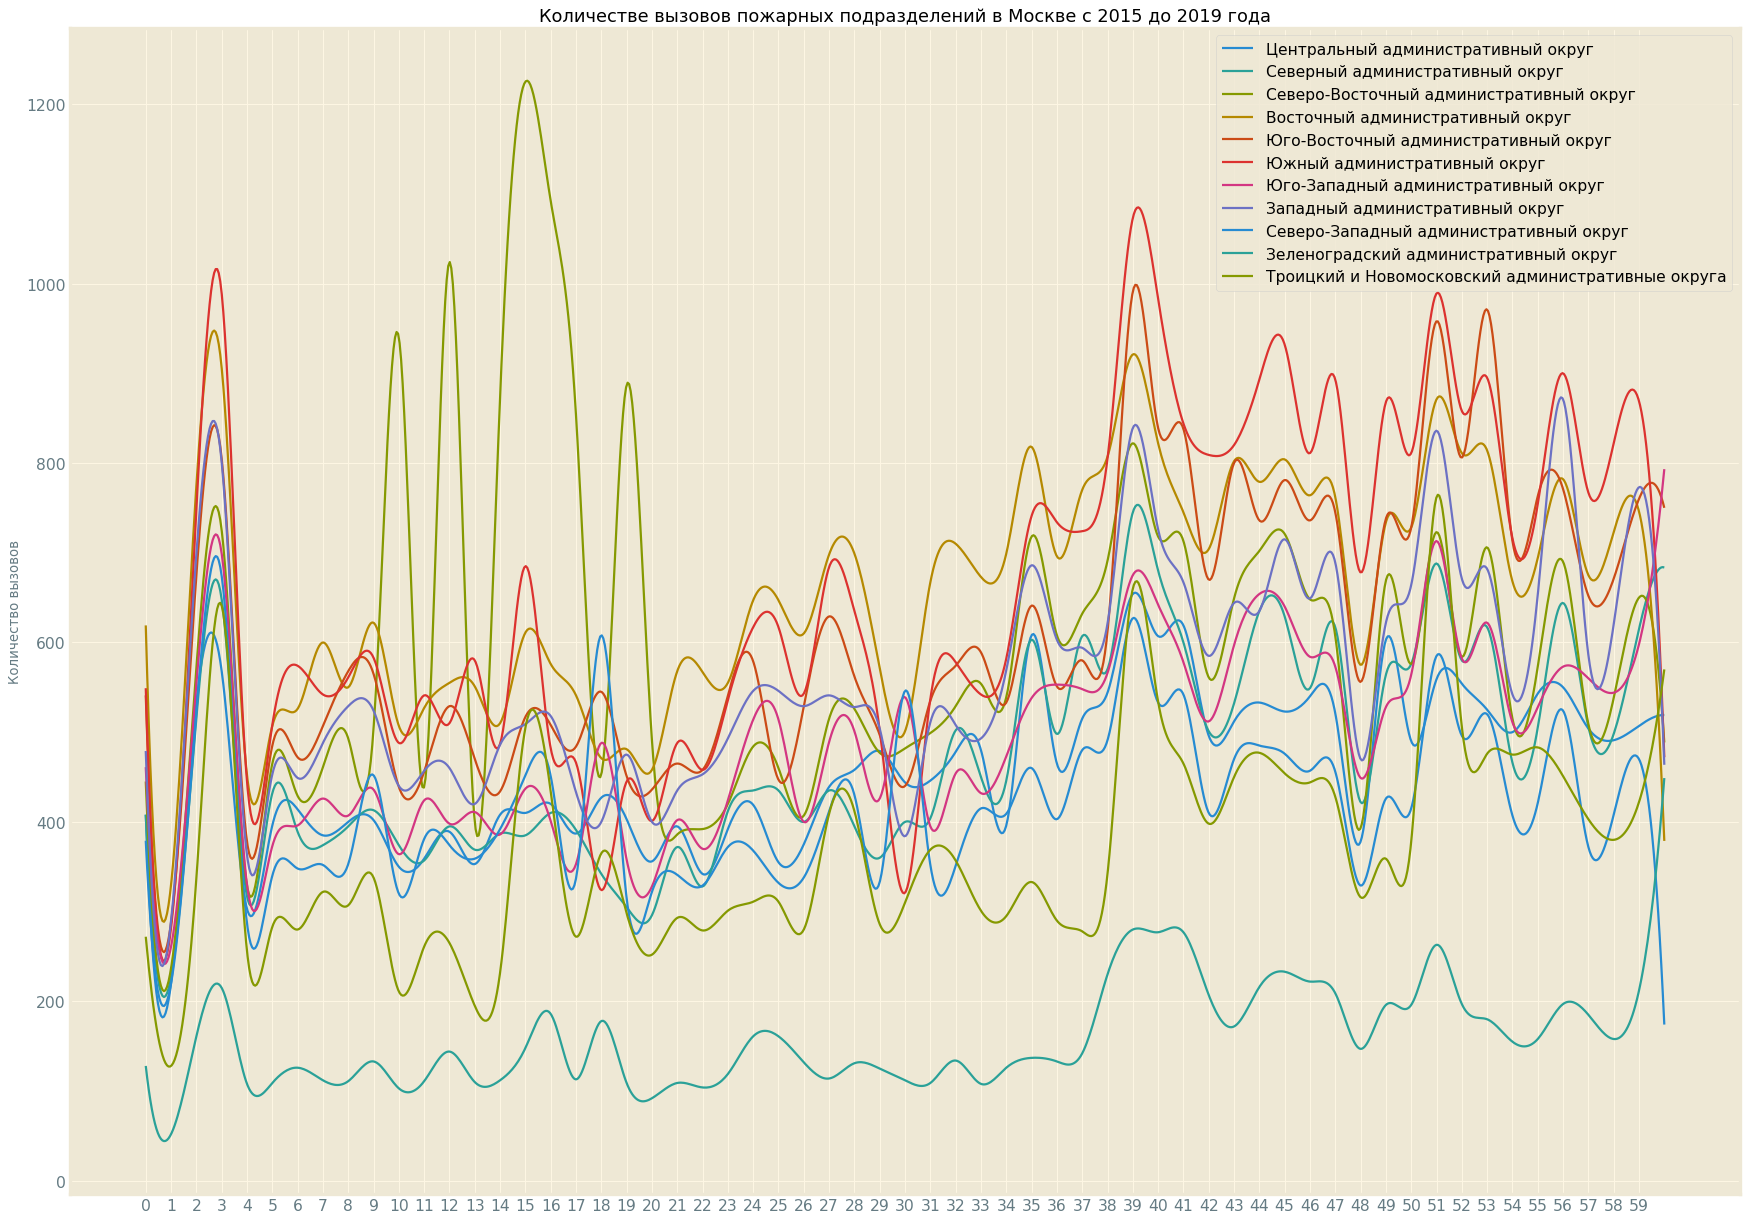

   0 - Январь 2015г, 1 - Февраль - 2015г, ..., 12 - Декабрь 2015г, 13 - Январь 2016г, ........, 59 - Декабрь 2019г


In [15]:
from scipy.interpolate import make_interp_spline, BSpline

fig = figure(num=None, figsize=(24, 18), dpi=80, facecolor='w', edgecolor='k')

x_args = np.array(range(len(adm_l['Юго-Западный административный округ'])))

for region in adm_l:
    xnew = np.linspace(0, len(adm_l[region]), 1000) 
    spl = make_interp_spline(x_args, adm_l[region], k=3)# type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew, power_smooth, label = region)
    
plt.title('Количестве вызовов пожарных подразделений в Москве с 2015 до 2019 года')
plt.xticks(ticks = x_args, label = x_arg)
plt.ylabel('Количество вызовов')
plt.legend()
plt.show()
print('   0 - Январь 2015г,', '1 - Февраль - 2015г,', '..., 12 - Декабрь 2015г, 13 - Январь 2016г, ........,',
      '59 - Декабрь 2019г' )